# <h1><center>Deep Learning</center><h1>


    
<div style="text-align: right"> Date: 10/05/2021 </div>

## <font color='darkorange'>Hackathon: Age Detection of Actors
</font>

___

In [91]:
import os
import random

import pandas as pd
import numpy as np
from imageio import imread
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from keras.utils.vis_utils import plot_model
from keras.models import model_from_json

#### Get CSV file containing class: Young, Middle, Old:

In [10]:
train = pd.read_csv('CSV file/train.csv')
test = pd.read_csv('CSV file/test.csv')

In [11]:
train

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
...,...,...
19901,2482.jpg,MIDDLE
19902,20085.jpg,YOUNG
19903,19663.jpg,MIDDLE
19904,10132.jpg,MIDDLE


In [12]:
test

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg
...,...
6631,1876.jpg
6632,14940.jpg
6633,3638.jpg
6634,376.jpg


#### Get current working directory:

In [13]:
data_dir = os.getcwd()
data_dir

'C:\\Users\\ACER\\MTECH - AI PROGRAMS\\S2\\Deep Learning\\Hackathon_1'

#### Show a random image from training set:

Age:OLD


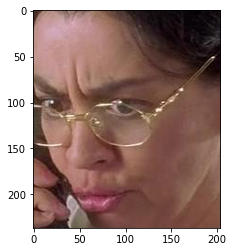

In [14]:
i = random.choice(train.index)

img_name = train.ID[i]
img = imread(os.path.join(data_dir, 'Train', img_name))


imshow(img)
print("Age:" + train.Class[i])

#### Get all images from training set, change it to 64x64 px image and store in stack:

In [15]:
temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32')
    temp.append(img)

train_x = np.stack(temp)

#### Get all images from testing set, change it to 64x64 px image and store in stack:

In [16]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = cv2.resize(img, (64, 64))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

In [17]:
train_x

array([[[[ 51.,  47.,  48.],
         [ 48.,  46.,  47.],
         [ 45.,  43.,  44.],
         ...,
         [  4.,  11.,   3.],
         [  7.,  14.,   6.],
         [  6.,  13.,   5.]],

        [[ 51.,  48.,  49.],
         [ 48.,  46.,  47.],
         [ 44.,  42.,  43.],
         ...,
         [  9.,  16.,   8.],
         [ 12.,  19.,  11.],
         [ 11.,  18.,  10.]],

        [[ 57.,  55.,  56.],
         [ 54.,  52.,  52.],
         [ 50.,  48.,  49.],
         ...,
         [ 18.,  24.,  17.],
         [ 20.,  25.,  18.],
         [ 19.,  24.,  17.]],

        ...,

        [[124., 152., 140.],
         [116., 143., 131.],
         [ 92., 115., 105.],
         ...,
         [100., 115., 122.],
         [120., 135., 142.],
         [135., 150., 157.]],

        [[120., 148., 136.],
         [112., 139., 128.],
         [ 90., 112., 102.],
         ...,
         [103., 118., 126.],
         [124., 138., 145.],
         [138., 153., 160.]],

        [[121., 149., 137.],
       

#### Normalize Pixel:

In [18]:
train_x = train_x / 255.
test_x = test_x / 255.

train_x.shape

(19906, 64, 64, 3)

In [13]:
train_x

array([[[[7.8431371e-04, 7.2279893e-04, 7.3817762e-04],
         [7.3817762e-04, 7.0742023e-04, 7.2279893e-04],
         [6.9204153e-04, 6.6128414e-04, 6.7666284e-04],
         ...,
         [6.1514809e-05, 1.6916571e-04, 4.6136101e-05],
         [1.0765091e-04, 2.1530181e-04, 9.2272203e-05],
         [9.2272203e-05, 1.9992310e-04, 7.6893506e-05]],

        [[7.8431371e-04, 7.3817762e-04, 7.5355632e-04],
         [7.3817762e-04, 7.0742023e-04, 7.2279893e-04],
         [6.7666284e-04, 6.4590544e-04, 6.6128414e-04],
         ...,
         [1.3840832e-04, 2.4605924e-04, 1.2302962e-04],
         [1.8454441e-04, 2.9219533e-04, 1.6916571e-04],
         [1.6916571e-04, 2.7681663e-04, 1.5378701e-04]],

        [[8.7658595e-04, 8.4582856e-04, 8.6120726e-04],
         [8.3044986e-04, 7.9969241e-04, 7.9969241e-04],
         [7.6893502e-04, 7.3817762e-04, 7.5355632e-04],
         ...,
         [2.7681663e-04, 3.6908881e-04, 2.6143793e-04],
         [3.0757402e-04, 3.8446751e-04, 2.7681663e-04],
  

In [20]:
# import keras
# from keras.utils import np_utils
# from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

AttributeError: module 'tensorflow.keras.utils' has no attribute 'np_utils'

In [21]:
# import keras
# from keras.utils import np_utils

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.to_categorical(train_y)

In [22]:
train_y.shape

(19906, 3)

In [23]:
train_y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### Model 1:

The input size has 64x64x3 and runs on 50 epochs with batch size of 64.

There are 4 convolutional layer and 4 Max pool layer in this model. Then followed by a dropout layer with 20% and fully connected layer. In FC, there are one input layer, 2 hidden layer and finaly a output layer with a softmax fuction. The model_1 gives accuarcy of approximately 74%.

In [82]:
input_num_units = (64, 64, 3)

epochs = 50
batch_size = 64

model_1 = Sequential()
model_1.add(Conv2D(60, (7, 7), padding="same", input_shape=(input_num_units), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(50, (5, 5), padding="same", input_shape=(input_num_units), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(40, (5, 5), padding="same", input_shape=(input_num_units), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(15, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Dropout(0.2))

model_1.add(Flatten())




model_1.add(Dense(128, activation='relu'))

model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(50, activation='relu'))

model_1.add(Dense(3, activation='softmax'))

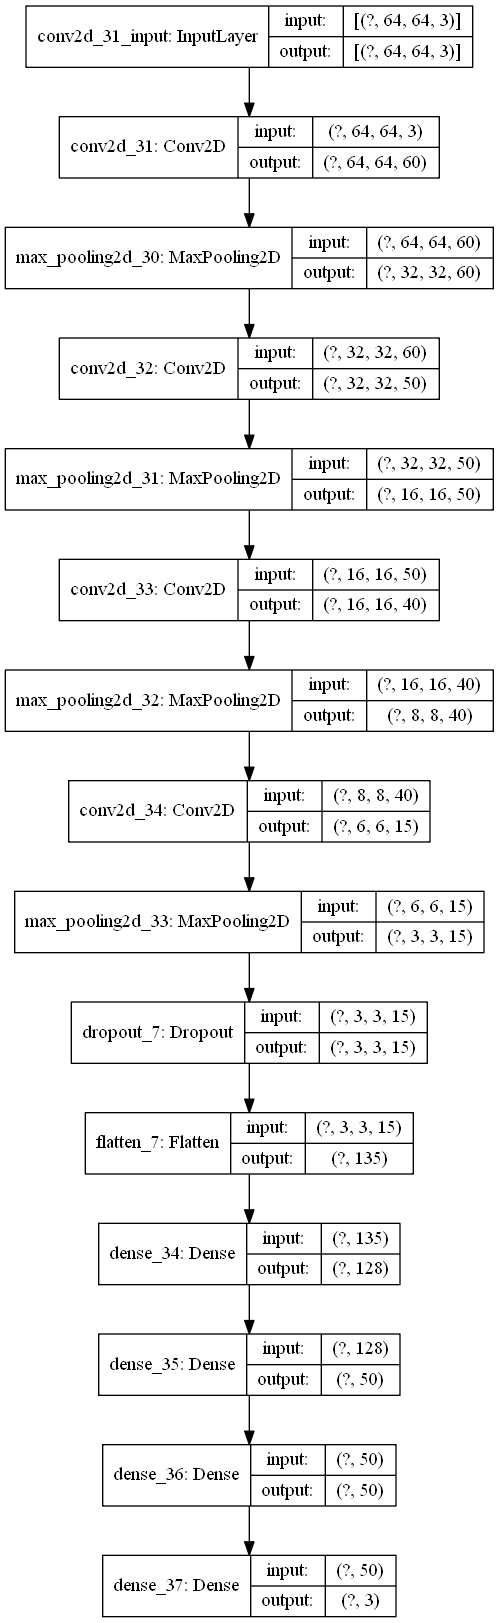

In [83]:
plot_model(model_1, to_file='model_1_plot.png', show_shapes=True, show_layer_names=True)

In [84]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 64, 64, 60)        8880      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 32, 32, 60)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 50)        75050     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 40)        50040     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 8, 8, 40)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 6, 6, 15)         

### Model 2:

The input size has 64x64x3 and runs on 30 epochs with batch size of 72.

There are 4 convolutional layer and 4 Max pool layer in this model. Then followed by a dropout layer with 20% and fully connected layer. In FC, there are one input layer, 4 hidden layer and finaly a output layer with a softmax fuction. The model_2 gives accuarcy of approximately 76%.

In [20]:
input_num_units = (64, 64, 3)

epochs = 30
batch_size = 72

model_2 = Sequential()
model_2.add(Conv2D(60, (7, 7), padding="same", input_shape=(input_num_units), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(50, (5, 5), padding="same", input_shape=(input_num_units), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(40, (5, 5), padding="same", input_shape=(input_num_units), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(15, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Dropout(0.2))

model_2.add(Flatten())




model_2.add(Dense(128, activation='relu'))

model_2.add(Dense(220, activation='relu'))
model_2.add(Dense(220, activation='relu'))
model_2.add(Dense(120, activation='relu'))
model_2.add(Dense(60, activation='relu'))


model_2.add(Dense(3, activation='softmax'))

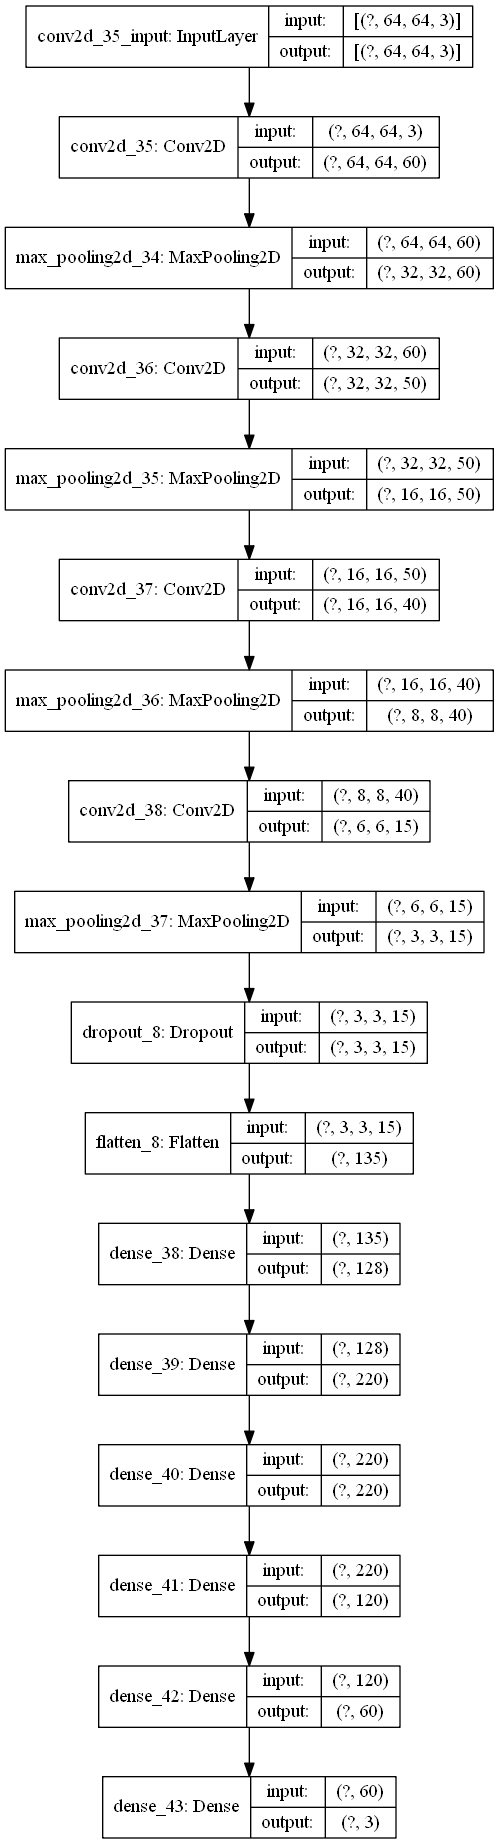

In [86]:
plot_model(model_2, to_file='model_2_plot.png', show_shapes=True, show_layer_names=True)

In [87]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 64, 64, 60)        8880      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 32, 32, 60)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 50)        75050     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 40)        50040     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 8, 8, 40)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 6, 6, 15)        

### Model 3:

The input size has 64x64x3 and runs on 30 epochs with batch size of 72.

There are 4 convolutional layer and 4 Max pool layer in this model. Then followed by a dropout layer with 40% and fully connected layer. In FC, there are one input layer, 4 hidden layer and finaly a output layer with a softmax fuction. The model_3 gives accuarcy of approximately 77%.

In [36]:
input_num_units = (64, 64, 3)

epochs = 30
batch_size = 72

model_3 = Sequential()
model_3.add(Conv2D(60, (7, 7), padding="same", input_shape=(input_num_units), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(50, (5, 5), padding="same", input_shape=(input_num_units), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(40, (5, 5), padding="same", input_shape=(input_num_units), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(15, (3, 3), padding="same", activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Dropout(0.4))

model_3.add(Flatten())



model_3.add(Dense(128, activation='relu'))

model_3.add(BatchNormalization(momentum=0.99,epsilon=0.001))
model_3.add(Dense(120, activation='relu'))
model_3.add(BatchNormalization(momentum=0.99,epsilon=0.001))
model_3.add(Dense(60, activation='relu'))


model_3.add(Dense(3, activation='softmax'))

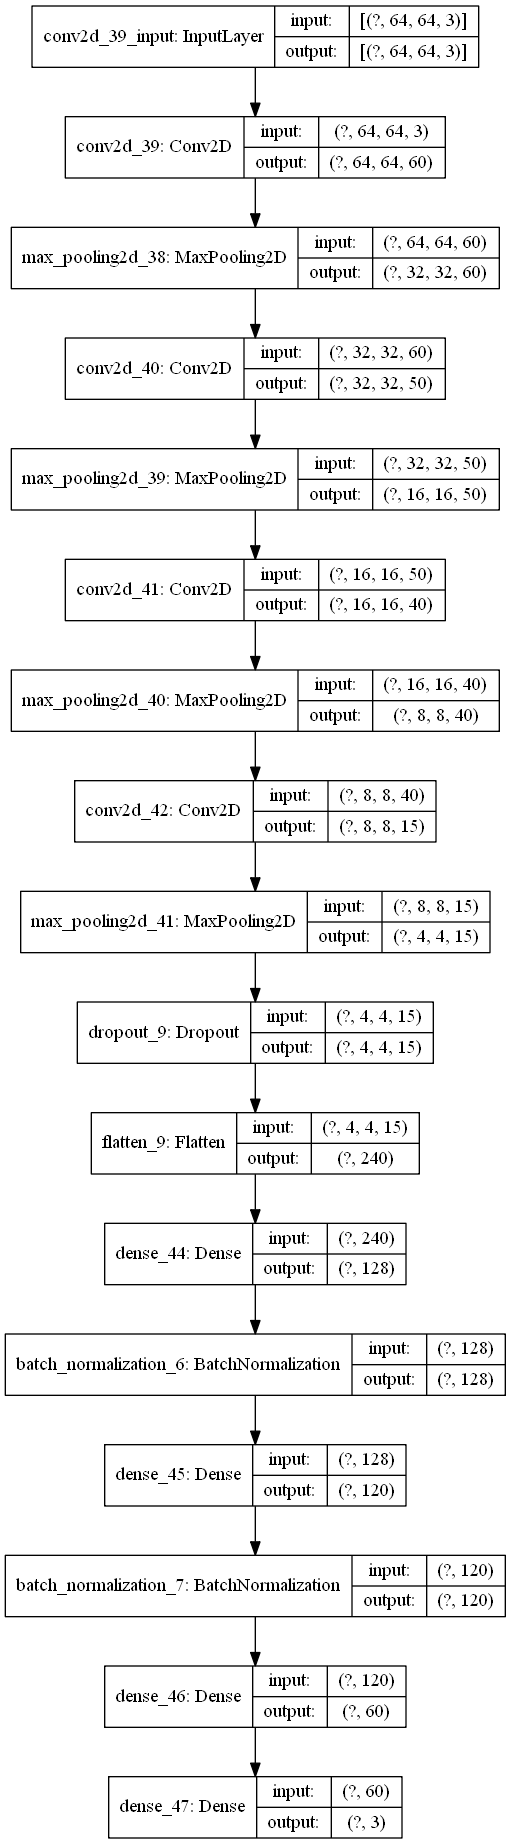

In [89]:
plot_model(model_3, to_file='model_3_plot.png', show_shapes=True, show_layer_names=True)

In [90]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 64, 64, 60)        8880      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 32, 32, 60)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 50)        75050     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 40)        50040     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 8, 8, 40)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 15)        

In [78]:
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_3.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1,validation_split = 0.2)

Epoch 1/30
222/222 [==============================] - 174s 784ms/step - loss: 1.0099 - accuracy: 0.5070 - val_loss: 0.9763 - val_accuracy: 0.4395
Epoch 2/30
222/222 [==============================] - 187s 842ms/step - loss: 0.9508 - accuracy: 0.5329 - val_loss: 0.9199 - val_accuracy: 0.5357
Epoch 3/30
222/222 [==============================] - 181s 815ms/step - loss: 0.9232 - accuracy: 0.5551 - val_loss: 0.9627 - val_accuracy: 0.5565
Epoch 4/30
222/222 [==============================] - 179s 805ms/step - loss: 0.8537 - accuracy: 0.6096 - val_loss: 0.8496 - val_accuracy: 0.5967
Epoch 5/30
222/222 [==============================] - 168s 755ms/step - loss: 0.7875 - accuracy: 0.6466 - val_loss: 0.7460 - val_accuracy: 0.6665
Epoch 6/30
222/222 [==============================] - 165s 744ms/step - loss: 0.7583 - accuracy: 0.6576 - val_loss: 0.7161 - val_accuracy: 0.6806
Epoch 7/30
222/222 [==============================] - 160s 723ms/step - loss: 0.7333 - accuracy: 0.6763 - val_loss: 0.7191 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


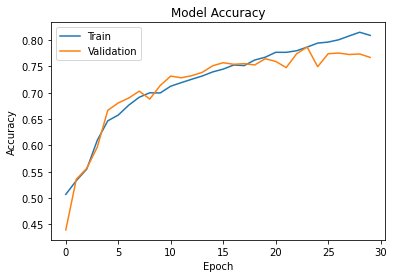

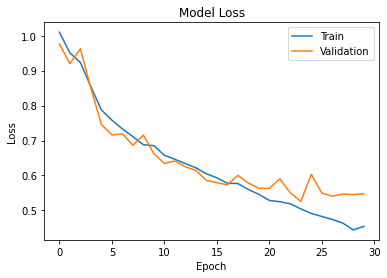

In [80]:
print(history.history.keys())


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Model 4:

The changed to input size has 32x32x3 and runs on 30 epochs with batch size of 72.

There are 7 convolutional layer and 3 Max pool layer in this model. Then followed by a dropout layer with 20% and fully connected layer. In FC, there are one input layer, 6 hidden layer and finaly a output layer with a softmax fuction. The model_4 gives accuarcy of approximately 75%.

In [51]:
input_num_units = (32, 32, 3)

epochs = 30
batch_size = 72

model_4 = Sequential()
model_4.add(Conv2D(64, (1, 1), padding="same", input_shape=(input_num_units), activation='relu'))
model_4.add(Conv2D(64, (1, 2), padding="same", activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(24, (2, 2), padding="same", activation='relu'))
model_4.add(Conv2D(24, (2, 2), padding="same", activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(12, (3, 1), padding="same", activation='relu'))
model_4.add(Conv2D(12, (3, 2), padding="same", activation='relu'))
model_4.add(Conv2D(12, (3, 3), padding="same", activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))



model_4.add(Dropout(0.2))
model_4.add(Flatten())


model_4.add(Dense(120, activation='relu'))

model_4.add(Dense(240, activation='relu'))
model_4.add(Dense(120, activation='relu'))
model_4.add(Dense(120, activation='relu'))
model_4.add(Dense(120, activation='relu'))
model_4.add(Dense(60, activation='relu'))
model_4.add(Dense(20, activation='relu'))


model_4.add(Dense(3, activation='softmax'))

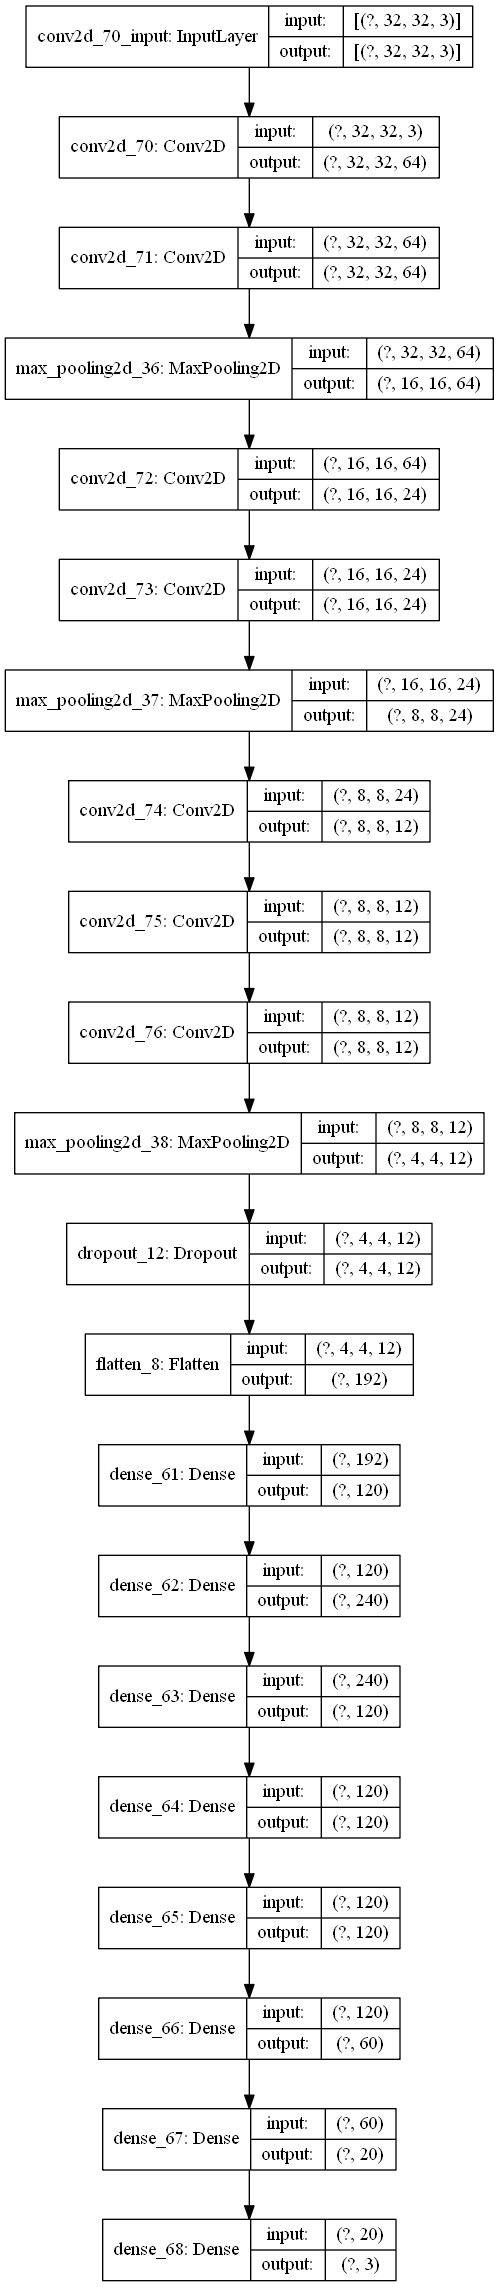

In [52]:
plot_model(model_4, to_file='model_3_plot.png', show_shapes=True, show_layer_names=True)

In [53]:
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 64)        8256      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 16, 16, 24)        6168      
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 16, 16, 24)        2328      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 8, 8, 24)          0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 8, 8, 12)         

In [54]:
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_4.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1,validation_split = 0.2)

Epoch 1/30
222/222 [==============================] - 34s 153ms/step - loss: 0.9570 - accuracy: 0.5333 - val_loss: 0.9248 - val_accuracy: 0.5439
Epoch 2/30
222/222 [==============================] - 35s 156ms/step - loss: 0.8493 - accuracy: 0.6024 - val_loss: 0.7855 - val_accuracy: 0.6464
Epoch 3/30
222/222 [==============================] - 34s 152ms/step - loss: 0.7754 - accuracy: 0.6564 - val_loss: 0.7319 - val_accuracy: 0.6806
Epoch 4/30
222/222 [==============================] - 34s 154ms/step - loss: 0.7435 - accuracy: 0.6714 - val_loss: 0.7316 - val_accuracy: 0.6961
Epoch 5/30
222/222 [==============================] - 34s 153ms/step - loss: 0.7143 - accuracy: 0.6886 - val_loss: 0.6922 - val_accuracy: 0.7027
Epoch 6/30
222/222 [==============================] - 34s 155ms/step - loss: 0.6915 - accuracy: 0.6979 - val_loss: 0.7023 - val_accuracy: 0.6979
Epoch 7/30
222/222 [==============================] - 34s 154ms/step - loss: 0.6711 - accuracy: 0.7072 - val_loss: 0.6687 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


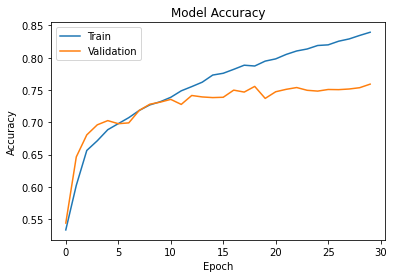

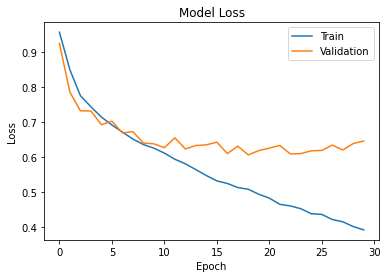

In [55]:
print(history.history.keys())


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [63]:
# serialize model to JSON
model_json = model_4.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_4.save_weights("my_model_4.h5")
print("Saved model to disk....")

Saved model to disk....


In [71]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# load weights into new model
model.load_weights("my_model_4.h5")
print("Loaded model from disk...")

Loaded model from disk...


In [32]:
pred = model_4.predict_classes(test_x)
pred = lb.inverse_transform(pred)

D:\Anaconda\envs\TF_GPU\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
pred

array(['MIDDLE', 'YOUNG', 'MIDDLE', ..., 'MIDDLE', 'MIDDLE', 'YOUNG'],
      dtype=object)

In [34]:
test['Class'] = pred
test

,ID,Class
0,25321.jpg,MIDDLE
1,989.jpg,YOUNG
2,19277.jpg,MIDDLE
3,13093.jpg,MIDDLE
4,5367.jpg,OLD
...,...,...
6631,1876.jpg,OLD
6632,14940.jpg,MIDDLE
6633,3638.jpg,MIDDLE
6634,376.jpg,MIDDLE


In [35]:
test.to_csv('submission_AkashKV.csv', index=False)

____

### Model 5: Tensorflow-GPU

In [9]:
import os
import random

import pandas as pd
import numpy as np
from imageio import imread
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder

In [32]:
# import keras
# from keras.utils import np_utils
# from sklearn.preprocessing import LabelEncoder

In [1]:
import os

#os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [4]:
tf.test.is_built_with_cuda()

True

In [6]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [63]:
model_4 = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(60, (7, 7), padding="same", activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(50, (5, 5), padding="same", activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(40, (5, 5), padding="same", activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(15, (3, 3), padding="same", activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(12, (2, 2), padding="same", activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Dropout(0.2),
        layers.Flatten(),
        
        
        layers.Dense(128, activation="relu"),
        
        layers.Dense(120, activation="tanh"),
        layers.Dense(120, activation="relu"),
        layers.Dense(120, activation="relu"),
        layers.Dense(40, activation="relu"),



        
        layers.Dense(3, activation="softmax"),

    ]
)


In [64]:
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_4.fit(train_x, train_y, batch_size=120,epochs=52,verbose=1,validation_split = 0.2)

Epoch 1/52
133/133 [==============================] - 8s 56ms/step - loss: 0.9384 - accuracy: 0.5461 - val_loss: 0.8379 - val_accuracy: 0.6070
Epoch 2/52
133/133 [==============================] - 7s 55ms/step - loss: 0.8044 - accuracy: 0.6416 - val_loss: 0.7547 - val_accuracy: 0.6700
Epoch 3/52
133/133 [==============================] - 7s 55ms/step - loss: 0.7435 - accuracy: 0.6754 - val_loss: 0.7467 - val_accuracy: 0.6768
Epoch 4/52
133/133 [==============================] - 7s 54ms/step - loss: 0.7084 - accuracy: 0.6924 - val_loss: 0.6941 - val_accuracy: 0.7002
Epoch 5/52
133/133 [==============================] - 7s 55ms/step - loss: 0.6778 - accuracy: 0.7075 - val_loss: 0.7102 - val_accuracy: 0.7117
Epoch 6/52
133/133 [==============================] - 7s 54ms/step - loss: 0.6611 - accuracy: 0.7162 - val_loss: 0.6813 - val_accuracy: 0.7012
Epoch 7/52
133/133 [==============================] - 7s 55ms/step - loss: 0.6272 - accuracy: 0.7309 - val_loss: 0.6521 - val_accuracy: 0.7288

KeyboardInterrupt: 

___